# Travel Insurance

In [73]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder

%matplotlib inline

## Get the data

In [17]:
df = pd.read_csv("https://s3.amazonaws.com/talent-assets.datacamp.com/travel_insurance.csv", dtype={'Employment Type': 'category'})
# binary columns
for col in ['GraduateOrNot', 'FrequentFlyer', 'EverTravelledAbroad']:
    df[col] = df[col].apply(lambda x: 1 if x == "Yes" else 0)
df.head()

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


In [22]:
df.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


## Difference in travel habits between customers and non-customers

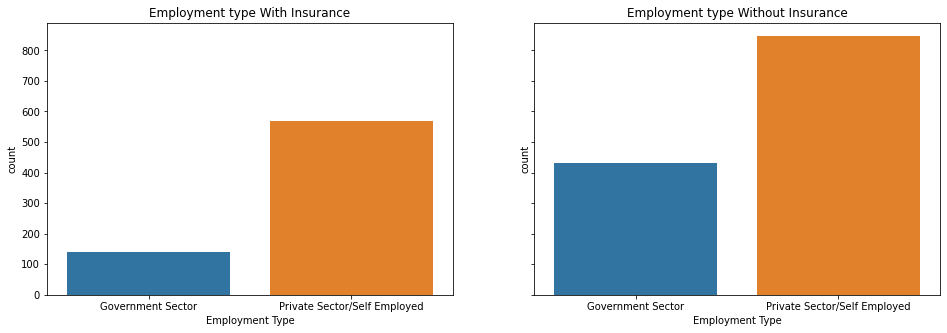

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches((16, 5))
sns.countplot(data=df[df['TravelInsurance'] == 1], x='Employment Type', ax=ax[0])
ax[0].set_title("Employment type With Insurance")
sns.countplot(data=df[df['TravelInsurance'] == 0], x='Employment Type', ax=ax[1])
ax[1].set_title("Employment type Without Insurance")
plt.show()

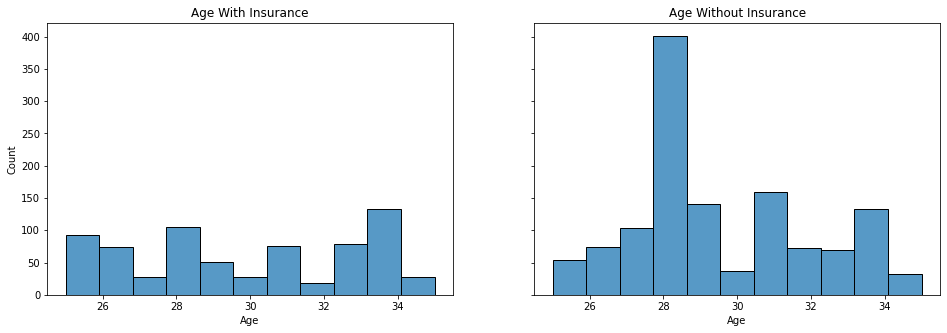

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches((16, 5))
sns.histplot(data=df[df['TravelInsurance'] == 1], x='Age', ax=ax[0], bins=11)
ax[0].set_title("Age With Insurance")
sns.histplot(data=df[df['TravelInsurance'] == 0], x='Age', ax=ax[1], bins=11)
ax[1].set_title("Age Without Insurance")
plt.show()

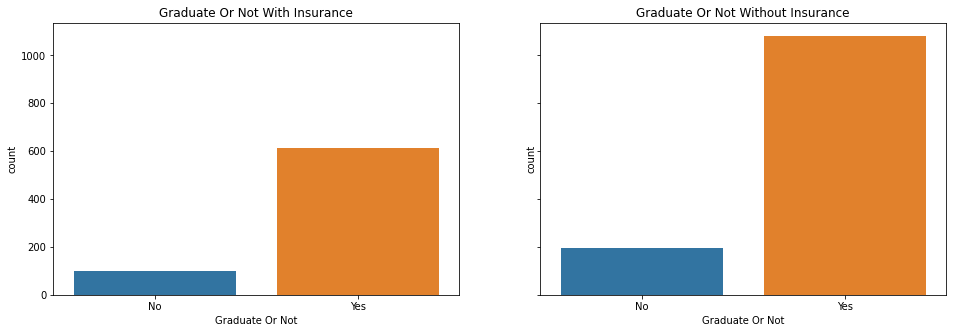

In [47]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches((16, 5))
sns.countplot(data=df[df['TravelInsurance'] == 1], x='GraduateOrNot', ax=ax[0])
ax[0].set_title("Graduate Or Not With Insurance")
ax[0].set_xlabel('Graduate Or Not')
ax[0].set_xticklabels(['No', 'Yes'])
sns.countplot(data=df[df['TravelInsurance'] == 0], x='GraduateOrNot', ax=ax[1])
ax[1].set_title("Graduate Or Not Without Insurance")
ax[1].set_xlabel('Graduate Or Not')
ax[1].set_xticklabels(['No', 'Yes'])
plt.show()

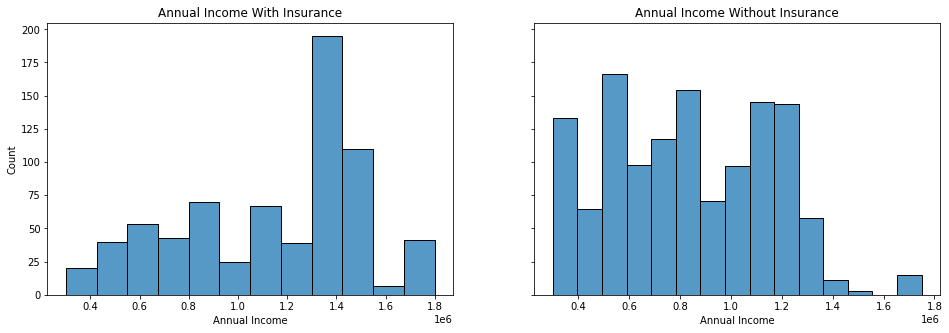

In [51]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches((16, 5))
sns.histplot(data=df[df['TravelInsurance'] == 1], x='AnnualIncome', ax=ax[0])
ax[0].set_title("Annual Income With Insurance")
ax[0].set_xlabel("Annual Income")
sns.histplot(data=df[df['TravelInsurance'] == 0], x='AnnualIncome', ax=ax[1])
ax[1].set_title("Annual Income Without Insurance")
ax[1].set_xlabel("Annual Income")
plt.show()

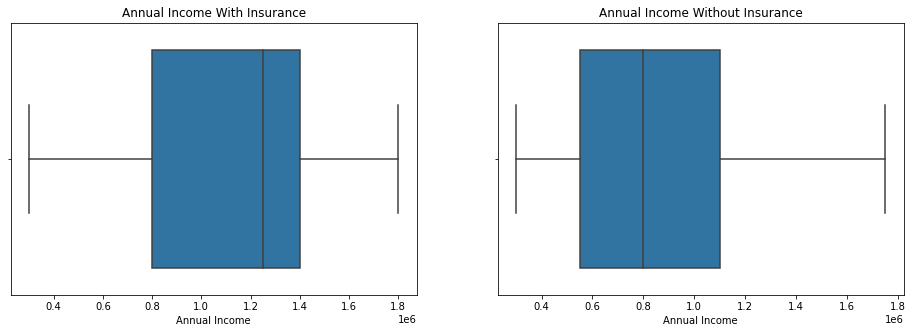

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches((16, 5))
sns.boxplot(data=df[df['TravelInsurance'] == 1], x='AnnualIncome', ax=ax[0])
ax[0].set_title("Annual Income With Insurance")
ax[0].set_xlabel("Annual Income")
sns.boxplot(data=df[df['TravelInsurance'] == 0], x='AnnualIncome', ax=ax[1])
ax[1].set_title("Annual Income Without Insurance")
ax[1].set_xlabel("Annual Income")
plt.show()

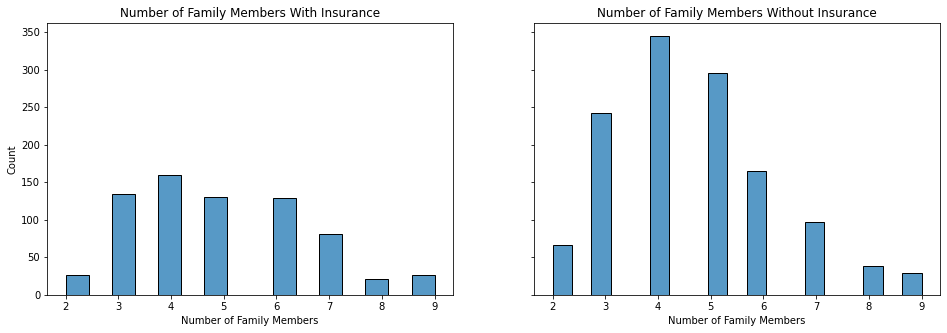

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches((16, 5))
sns.histplot(data=df[df['TravelInsurance'] == 1], x='FamilyMembers', ax=ax[0])
ax[0].set_title("Number of Family Members With Insurance")
ax[0].set_xlabel('Number of Family Members')
sns.histplot(data=df[df['TravelInsurance'] == 0], x='FamilyMembers', ax=ax[1])
ax[1].set_title("Number of Family Members Without Insurance")
ax[1].set_xlabel('Number of Family Members')
plt.show()

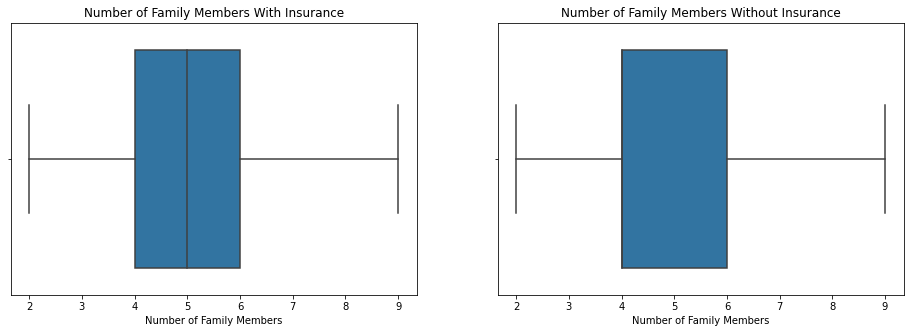

In [56]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches((16, 5))
sns.boxplot(data=df[df['TravelInsurance'] == 1], x='FamilyMembers', ax=ax[0])
ax[0].set_title("Number of Family Members With Insurance")
ax[0].set_xlabel('Number of Family Members')
sns.boxplot(data=df[df['TravelInsurance'] == 0], x='FamilyMembers', ax=ax[1])
ax[1].set_title("Number of Family Members Without Insurance")
ax[1].set_xlabel('Number of Family Members')
plt.show()

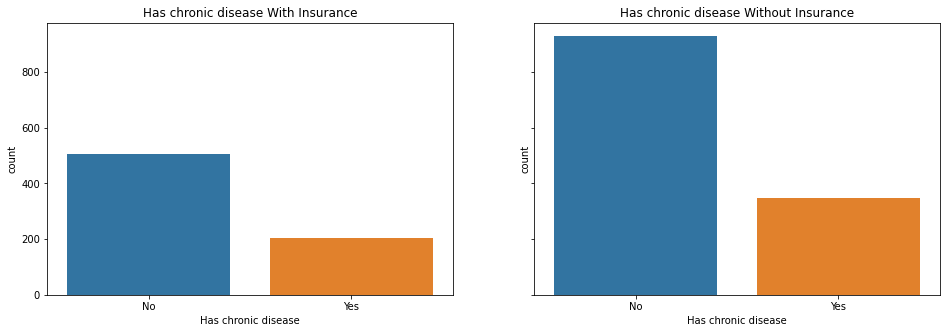

In [58]:
# ChronicDiseases
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches((16, 5))
sns.countplot(data=df[df['TravelInsurance'] == 1], x='ChronicDiseases', ax=ax[0])
ax[0].set_title("Has chronic disease With Insurance")
ax[0].set_xlabel('Has chronic disease')
ax[0].set_xticklabels(['No', 'Yes'])
sns.countplot(data=df[df['TravelInsurance'] == 0], x='ChronicDiseases', ax=ax[1])
ax[1].set_title("Has chronic disease Without Insurance")
ax[1].set_xlabel('Has chronic disease')
ax[1].set_xticklabels(['No', 'Yes'])
plt.show()

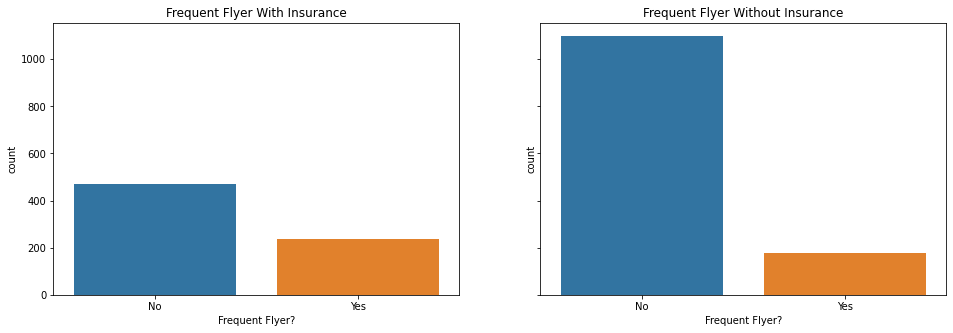

In [60]:
# FrequentFlyer
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches((16, 5))
sns.countplot(data=df[df['TravelInsurance'] == 1], x='FrequentFlyer', ax=ax[0])
ax[0].set_title("Frequent Flyer With Insurance")
ax[0].set_xlabel('Frequent Flyer?')
ax[0].set_xticklabels(['No', 'Yes'])
sns.countplot(data=df[df['TravelInsurance'] == 0], x='FrequentFlyer', ax=ax[1])
ax[1].set_title("Frequent Flyer Without Insurance")
ax[1].set_xlabel('Frequent Flyer?')
ax[1].set_xticklabels(['No', 'Yes'])
plt.show()

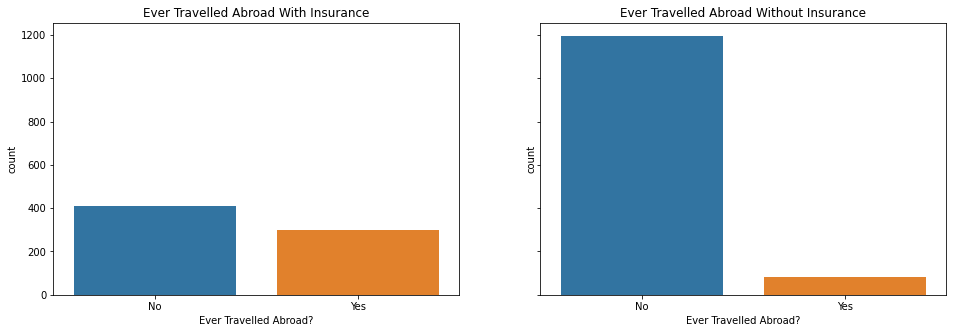

In [62]:
# EverTravelledAbroad
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True)
fig.set_size_inches((16, 5))
sns.countplot(data=df[df['TravelInsurance'] == 1], x='EverTravelledAbroad', ax=ax[0])
ax[0].set_title("Ever Travelled Abroad With Insurance")
ax[0].set_xlabel('Ever Travelled Abroad?')
ax[0].set_xticklabels(['No', 'Yes'])
sns.countplot(data=df[df['TravelInsurance'] == 0], x='EverTravelledAbroad', ax=ax[1])
ax[1].set_title("Ever Travelled Abroad Without Insurance")
ax[1].set_xlabel('Ever Travelled Abroad?')
ax[1].set_xticklabels(['No', 'Yes'])
plt.show()

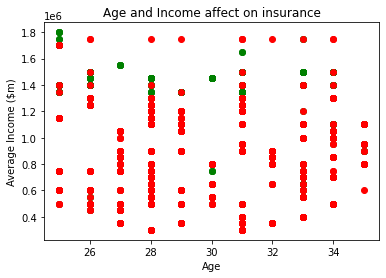

In [104]:
# age and income
plt.scatter('Age', "AnnualIncome", data=df[df.TravelInsurance == 1], label="Y", color="g")
plt.scatter('Age', "AnnualIncome", data=df[df.TravelInsurance == 0], label="N", color="r")
#plt.legend()
plt.title("Age and Income affect on insurance")
plt.xlabel("Age")
plt.ylabel("Average Income ($m)")
plt.show()

## Use Logistic Regression to model average customer

In [74]:
X = df.copy()
y = df['TravelInsurance']
X.drop('TravelInsurance', inplace=True, axis=1)
#clf = LogisticRegressionCV(cv=5, random_state=42).fit(X, y)
clf = Pipeline([
    ('oe', OrdinalEncoder()),
    ('lr', LogisticRegressionCV(cv=5, random_state=42))
])
clf.fit(X, y)
clf.score(X, y)

0.7825868142929039

In [77]:
clf[1].coef_

array([[ 0.01385287,  0.00238613, -0.00037609,  0.08262159,  0.01154427,
         0.00076753,  0.00507611,  0.01078283]])

In [78]:
clf[1].intercept_

array([-1.78458363])

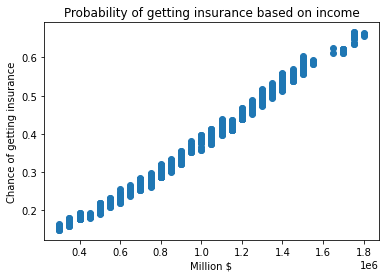

In [93]:
# Income on insurance
y_pred_proba = clf.predict_proba(X)
plt.scatter(X.AnnualIncome, y_pred_proba[:,1])
plt.xlabel('Million $')
plt.ylabel("Chance of getting insurance")
plt.title('Probability of getting insurance based on income')
plt.show()